In [2]:
require(tidyverse)
require(data.table)
require(ggplot2)
require(RColorBrewer)
require(extrafont)  # fonts 
# https://blog.revolutionanalytics.com/2012/09/how-to-use-your-favorite-fonts-in-r-charts.html
suppressMessages(loadfonts())
require(ggthemes)

require(ggpubr)


theme_pubr<- function (base_size = 11, base_family = "Arial") 
{
    theme_foundation() + theme(line = element_line(colour = "black", 
        lineend = "round", linetype = "solid"), rect = element_rect(fill = "white", 
        colour = "black", linetype = "solid"), text = element_text(colour = "black", 
        face = "plain", family = base_family, size = base_size, 
        vjust = 0.5, hjust = 0.5, lineheight = 0.5), panel.background = element_blank(), 
        plot.background = element_blank(), panel.border = element_rect(colour = "black", 
            fill = NA), panel.grid = element_blank(), strip.background = element_rect(colour = NA), 
        legend.key = element_rect(colour = NA), title = element_text(size = rel(1)), 
        plot.title = element_text(size = rel(1.2), face = "bold"), 
        strip.text = element_text(), axis.ticks.length = unit(1, 
    "mm"))
}


In [3]:
res.gsea <- do.call(rbind, lapply(c("alpha", "beta", "delta"), function(ct) fread(paste0("../figures/Fig2/subfigs/GSEA_", 
    ct, "_res_final.csv")) %>% mutate(ranklist = ct)))
# res.gsea %>% head(1) res.gsea %>% str res.gsea %>% pull(Term) %>% unique
res.gsea <- res.gsea %>% mutate(glist_set = ifelse(Term %in% paste0(rep(c("Alpha", 
    "Beta", "Delta"), each = 2), 1:2), "thisStudy", ifelse(grepl("xin", Term), "Xin_et_al", 
    ifelse(grepl("Mawla", Term), "Mawla_et_al", "patchSeq")))) %>% mutate(significance = ifelse(fdr < 
    0.01, "**", ifelse(fdr < 0.1, "*", NA))) %>% mutate(glist_set = factor(glist_set, 
    levels = c("thisStudy", "Xin_et_al", "Mawla_et_al", "patchSeq")), ranklist = factor(ranklist, 
    levels = rev(c("alpha", "beta", "delta"))))
options(repr.plot.width = 5, repr.plot.height = 3)
rg <- res.gsea$nes %>% range(na.rm = T)
rg

[1] -47.79763  20.42939

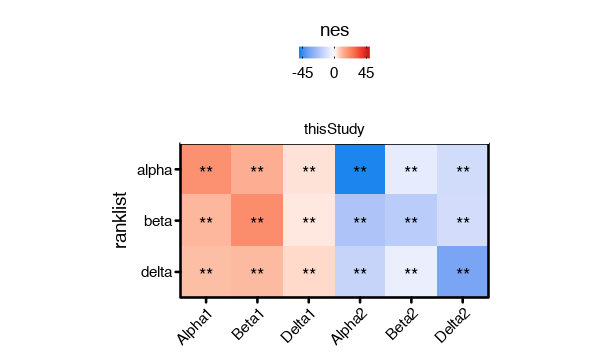

In [7]:
res.gsea <- do.call(rbind, lapply(c("alpha", "beta", "delta"), function(ct) fread(paste0("../figures/Fig2/subfigs/GSEA_", 
    ct, "_res_final.csv")) %>% mutate(ranklist = ct)))
# res.gsea %>% head(1) res.gsea %>% str res.gsea %>% pull(Term) %>% unique
res.gsea <- res.gsea %>% mutate(glist_set = ifelse(Term %in% paste0(rep(c("Alpha", 
    "Beta", "Delta"), each = 2), 1:2), "thisStudy", ifelse(grepl("xin", Term), "Xin_et_al", 
    ifelse(grepl("Mawla", Term), "Mawla_et_al", "patchSeq")))) %>% mutate(significance = ifelse(fdr < 
    0.01, "**", ifelse(fdr < 0.1, "*", NA))) %>% mutate(glist_set = factor(glist_set, 
    levels = c("thisStudy", "Xin_et_al", "Mawla_et_al", "patchSeq")), ranklist = factor(ranklist, 
    levels = rev(c("alpha", "beta", "delta"))))
options(repr.plot.width = 5, repr.plot.height = 3)
rg <- res.gsea$nes %>% range(na.rm = T)
# rg.max <- min(abs(rg)) %>% floor
ggplot(res.gsea %>% filter(glist_set == "thisStudy") %>% mutate(Term = factor(Term, 
    levels = paste0(c("Alpha", "Beta", "Delta"), rep(c(1, 2), each = 3)))), aes(Term, 
    ranklist)) + geom_tile(aes(fill = nes)) + geom_text(aes(label = significance), 
    hjust = 0.5, vjust = 0.75) + facet_grid(. ~ glist_set, scales = "free_x", space = "free") + 
    scale_fill_gradientn(colors = c("dodgerblue2", "white", "#FCBBA1", "#FC9272", 
        "#FB6A4A", "#EF3B2C", "#CB181D"), values = scales::rescale(c(rg[1], seq(0, 
        -rg[1], length.out = 6))), limits = c(rg[1], -rg[1]), guide = guide_colourbar(ticks.colour = "black", 
        title.position = "top", title.hjust = 0.5, nbins = 10), breaks = c(-45, 0, 
        45)) + theme_pubr() + theme(axis.title.x = element_blank(), aspect.ratio = 1, 
    legend.box.background = element_blank(), legend.box.margin = margin(0, 0, 0, 
        0), legend.key.width = unit("3", "mm"), legend.key.height = unit("2.5", "mm"), 
    legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1)) + 
    coord_cartesian(expand = F, clip = "off")
ggsave(filename = "../figures/Fig2/subfigs/fig_2B.prom_GSEA_a.pdf", width = 5, height = 3, 
    useDingbats = F)
system("open ../figures/Fig2/subfigs/fig_2B.prom_GSEA_a.pdf")
fwrite(res.gsea %>% arrange(glist_set, ranklist), "../figures/Fig2/subfigs/fig_2B.prom_GSEA_a.csv")
system("open ../figures/Fig2/subfigs/fig_2B.prom_GSEA.csv")

In [5]:
options(repr.plot.width = 5, repr.plot.height = 3)
res.gsea <- res.gsea %>% filter(glist_set != "thisStudy")
rg <- res.gsea$nes %>% range(na.rm = T)
rg


[1] -4.037369  1.859557

[1] -4.037369  1.859557

Warning message:
“Removed 15 rows containing missing values (geom_text).”

Warning message:
“Removed 15 rows containing missing values (geom_text).”

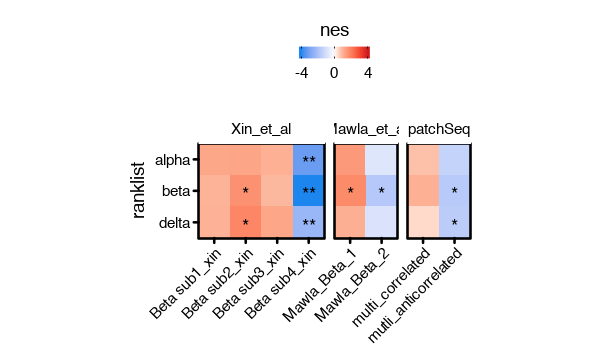

In [6]:
options(repr.plot.width = 5, repr.plot.height = 3)
res.gsea <- res.gsea %>% filter(glist_set != "thisStudy")
rg <- res.gsea$nes %>% range(na.rm = T)
rg
ggplot(res.gsea, aes(Term, ranklist)) + geom_tile(aes(fill = nes)) + geom_text(aes(label = significance), 
    hjust = 0.5, vjust = 0.75) + facet_grid(. ~ glist_set, scales = "free_x", space = "free") + 
    scale_fill_gradientn(colors = c("dodgerblue2", "white", "#FCBBA1", "#FC9272", 
        "#FB6A4A", "#EF3B2C", "#CB181D"), values = scales::rescale(c(rg[1], seq(0, 
        -rg[1], length.out = 6))), limits = c(rg[1], -rg[1]), guide = guide_colourbar(ticks.colour = "black", 
        title.position = "top", title.hjust = 0.5, nbins = 10), breaks = c(-4, 0, 
        4)) + theme_pubr() + theme(axis.title.x = element_blank(), aspect.ratio = 1, 
    legend.box.background = element_blank(), legend.box.margin = margin(0, 0, 0, 
        0), legend.key.width = unit("3", "mm"), legend.key.height = unit("2.5", "mm"), 
    legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1)) + 
    coord_cartesian(expand = F, clip = "off")
ggsave(filename = "../figures/Fig2/subfigs/fig_2B.prom_GSEA_b.pdf", width = 5, height = 3, 
    useDingbats = F)
system("open ../figures/Fig2/subfigs/fig_2B.prom_GSEA_b.pdf")